In [ ]:
import pandas as pd

**Importing Other necessary Libraries**

In [ ]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

Loading the Data sets

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/1- mental-illnesses-prevalence.csv")

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv")

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/6- depressive-symptoms-across-us-population.csv")

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

**EDA Exploratory Data Analysis**

In [ ]:
df1.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [ ]:
df2.head()

,Entity,Code,Year,Major depression
0,Andean Latin America,NaN,2008,0.0
1,Asia Pacific,NaN,2008,80.8
2,Australasia,NaN,2008,100.0
3,Caribbean,NaN,2008,9.1
4,Central Asia,NaN,2008,0.0


In [ ]:
df3.head()

,Entity,Code,Year,Nearly every day,More than half the days,Several days,Not at all
0,Appetite change,NaN,2014,4.6,5.1,15.5,74.8
1,Average across symptoms,NaN,2014,4.4,4.3,15.0,76.3
2,Depressed mood,NaN,2014,3.6,3.9,16.8,75.7
3,Difficulty concentrating,NaN,2014,3.5,3.6,10.9,82.1
4,Loss of interest,NaN,2014,4.4,5.4,16.3,73.8


In [ ]:
df4.head()

,Entity,Code,Year,Number of countries with primary data on prevalence of mental disorders
0,Alcohol use disorders,NaN,2019,58
1,Amphetamine use disorders,NaN,2019,58
2,Anorexia nervosa,NaN,2019,27
3,Anxiety disorders,NaN,2019,58
4,Attention-deficit hyperactivity disorder,NaN,2019,172


**let's Describe our Data set to understand more of its statistics**

In [ ]:
df1.describe()

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


In [ ]:
df2.describe()

,Year,Major depression
count,22.0,22.000000
mean,2008.0,28.995455
std,0.0,33.230042
min,2008.0,0.000000
25%,2008.0,1.400000
50%,2008.0,15.250000
75%,2008.0,46.900000
max,2008.0,100.000000


In [ ]:
df3.describe()

,Code,Year,Nearly every day,More than half the days,Several days,Not at all
count,0.0,10.0,10.00000,10.000000,10.000000,10.000000
mean,NaN,2014.0,4.42000,4.260000,15.000000,76.310000
std,NaN,0.0,2.75552,2.067312,8.554271,13.162949
min,NaN,2014.0,0.60000,0.600000,2.300000,49.100000
25%,NaN,2014.0,3.12500,3.075000,11.050000,74.050000
50%,NaN,2014.0,4.00000,4.100000,15.250000,76.000000
75%,NaN,2014.0,4.55000,5.325000,16.675000,82.475000
max,NaN,2014.0,9.20000,7.800000,34.000000,96.600000


In [ ]:
df4.describe()

,Code,Year,Number of countries with primary data on prevalence of mental disorders
count,0.0,15.0,15.000000
mean,NaN,2019.0,56.733333
std,NaN,0.0,46.172760
min,NaN,2019.0,2.000000
25%,NaN,2019.0,31.000000
50%,NaN,2019.0,41.000000
75%,NaN,2019.0,63.000000
max,NaN,2019.0,172.000000


**Checking for missing values**

In [ ]:
df1.isna().sum()

Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64

From the above, it shows that the code column has soo many missing values and therefore I eliminate it

In [ ]:
df1.drop('Code', axis=1, inplace=True)


Now lets check if the column has been eliminated successfully

In [ ]:
df1.isna().sum()

Entity                                                                               0
Year                                                                                 0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           0
dtype: int64

Well done!

In [ ]:
df2.isna().sum()

Entity               0
Code                21
Year                 0
Major depression     0
dtype: int64

In [ ]:
df2.drop('Code', axis=1, inplace=True)

In [ ]:
df3.isna().sum()

Entity                      0
Code                       10
Year                        0
Nearly every day            0
More than half the days     0
Several days                0
Not at all                  0
dtype: int64

In [ ]:
df3.drop('Code', axis=1, inplace=True)

In [ ]:
df4.isna().sum()

Entity                                                                      0
Code                                                                       15
Year                                                                        0
Number of countries with primary data on prevalence of mental disorders     0
dtype: int64

In [ ]:
df4.drop('Code', axis=1, inplace=True)

**Now lets investigate the information about every data and also the columns in eaach data**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Year                                                                               6420 non-null   int64  
 2   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 3   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 4   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float64
 5   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

In [ ]:
df1.columns

Index(['Entity', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            22 non-null     object 
 1   Year              22 non-null     int64  
 2   Major depression  22 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 656.0+ bytes


In [ ]:
df2.columns

Index(['Entity', 'Year', 'Major depression'], dtype='object')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   10 non-null     object 
 1   Year                     10 non-null     int64  
 2   Nearly every day         10 non-null     float64
 3   More than half the days  10 non-null     float64
 4   Several days             10 non-null     float64
 5   Not at all               10 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 608.0+ bytes


In [ ]:
df3.columns

Index(['Entity', 'Year', 'Nearly every day', 'More than half the days',
       'Several days', 'Not at all'],
      dtype='object')

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Entity                                                                   15 non-null     object
 1   Year                                                                     15 non-null     int64 
 2   Number of countries with primary data on prevalence of mental disorders  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


In [ ]:
df4.columns

Index(['Entity', 'Year',
       'Number of countries with primary data on prevalence of mental disorders'],
      dtype='object')

**Visualization Part**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


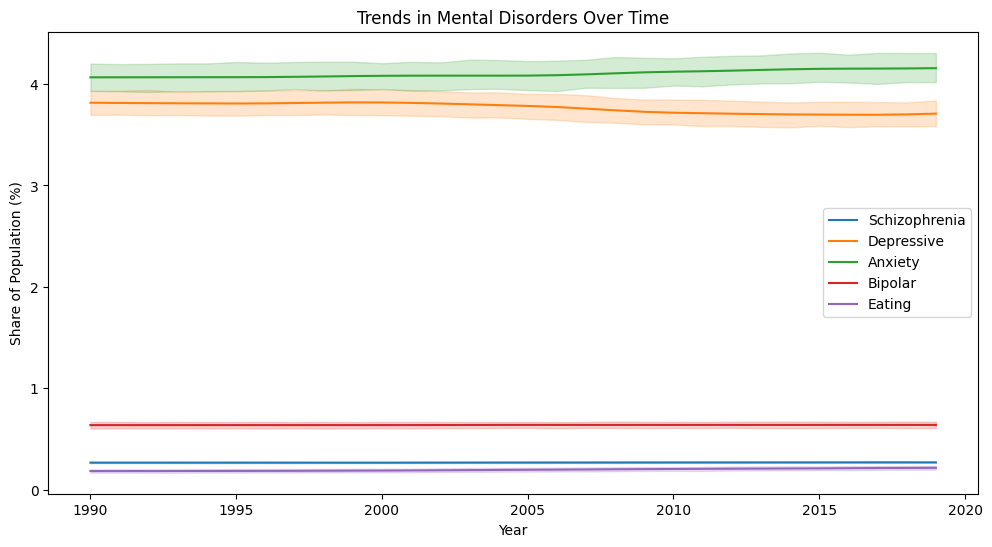

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='Year', y='Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', label='Schizophrenia')
sns.lineplot(data=df1, x='Year', y='Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', label='Depressive')
sns.lineplot(data=df1, x='Year', y='Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', label='Anxiety')
sns.lineplot(data=df1, x='Year', y='Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', label='Bipolar')
sns.lineplot(data=df1, x='Year', y='Eating disorders (share of population) - Sex: Both - Age: Age-standardized', label='Eating')
plt.xlabel('Year')
plt.ylabel('Share of Population (%)')
plt.title('Trends in Mental Disorders Over Time')
plt.legend()
plt.show()


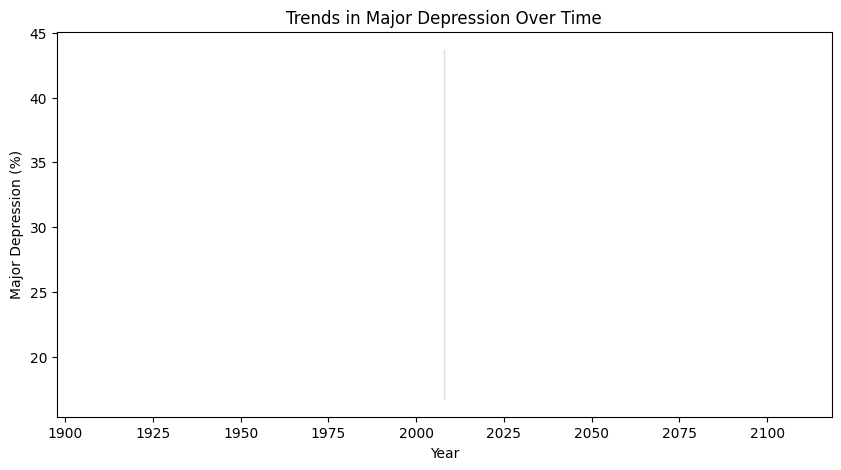

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x='Year', y='Major depression')
plt.xlabel('Year')
plt.ylabel('Major Depression (%)')
plt.title('Trends in Major Depression Over Time')
plt.show()


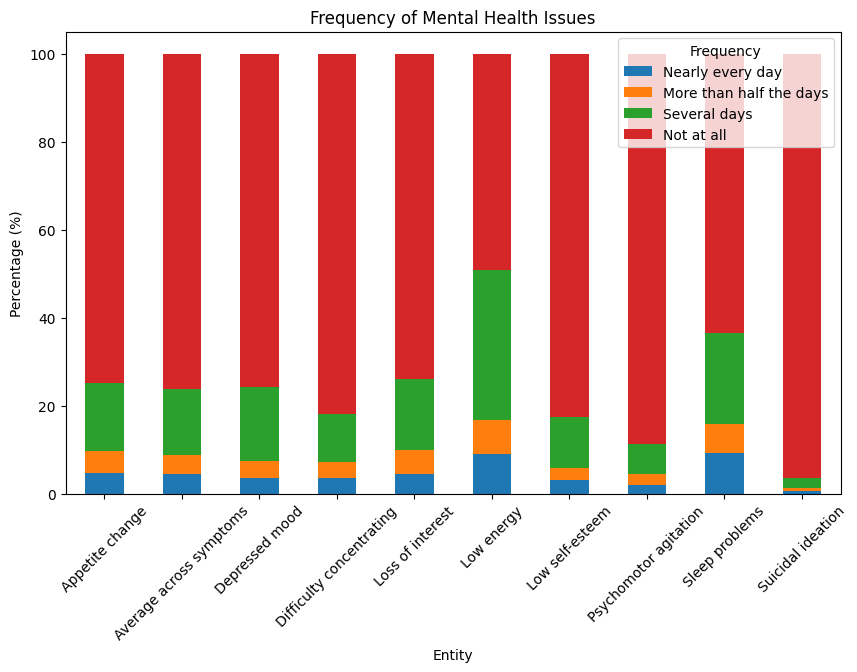

In [ ]:
df3.set_index('Entity')[['Nearly every day', 'More than half the days', 'Several days', 'Not at all']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Entity')
plt.ylabel('Percentage (%)')
plt.title('Frequency of Mental Health Issues')
plt.xticks(rotation=45)
plt.legend(title='Frequency')
plt.show()


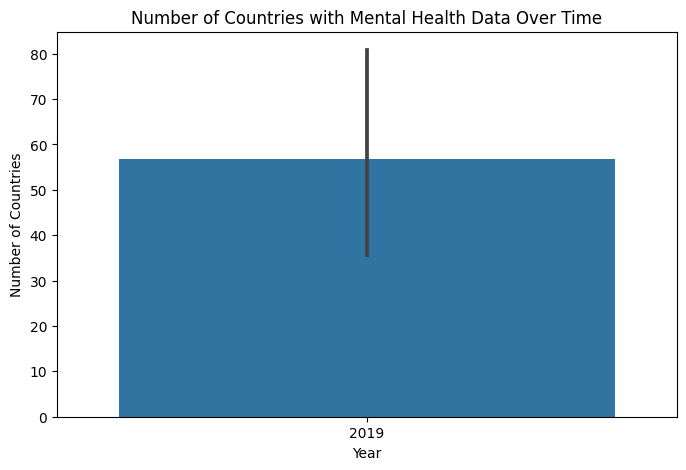

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df4, x='Year', y='Number of countries with primary data on prevalence of mental disorders')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.title('Number of Countries with Mental Health Data Over Time')
plt.show()


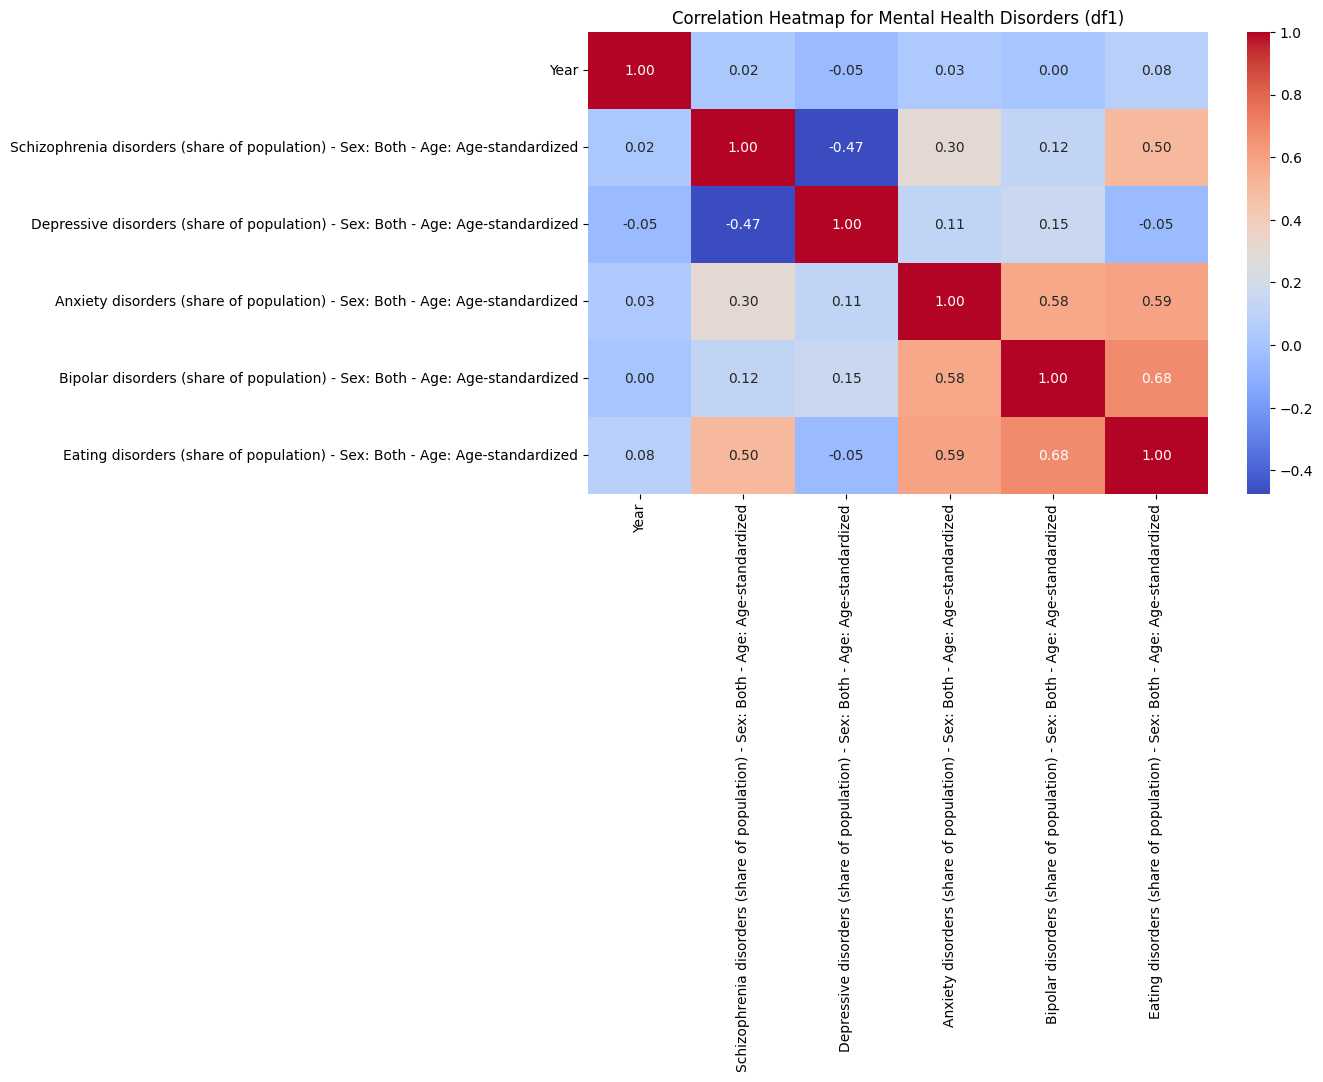

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Mental Health Disorders (df1)')
plt.show()


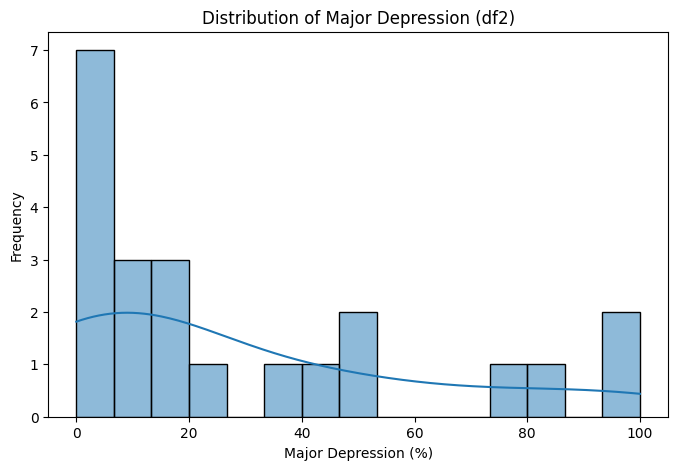

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['Major depression'], bins=15, kde=True)
plt.xlabel('Major Depression (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Major Depression (df2)')
plt.show()


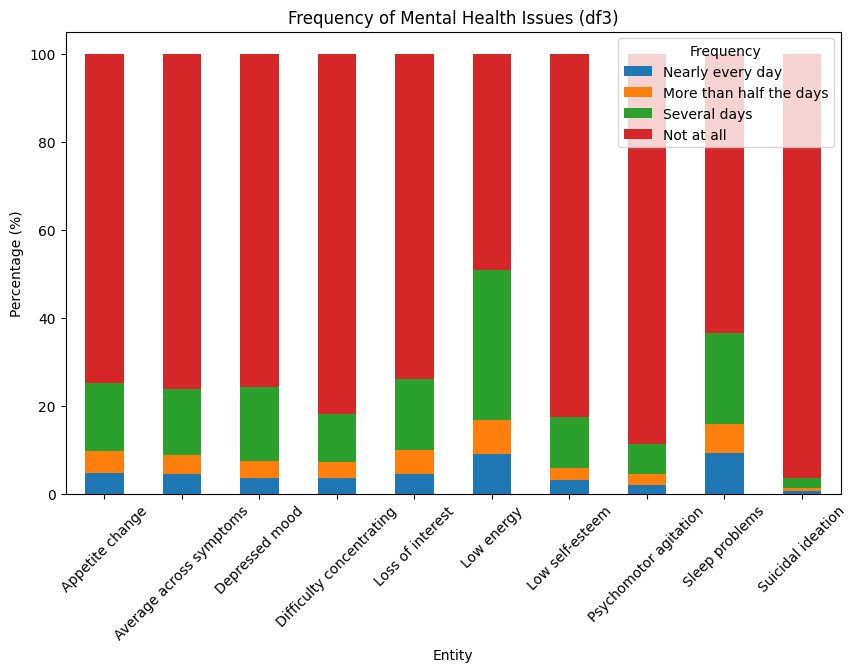

In [ ]:
df3.set_index('Entity')[['Nearly every day', 'More than half the days', 'Several days', 'Not at all']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Entity')
plt.ylabel('Percentage (%)')
plt.title('Frequency of Mental Health Issues (df3)')
plt.xticks(rotation=45)
plt.legend(title='Frequency')
plt.show()


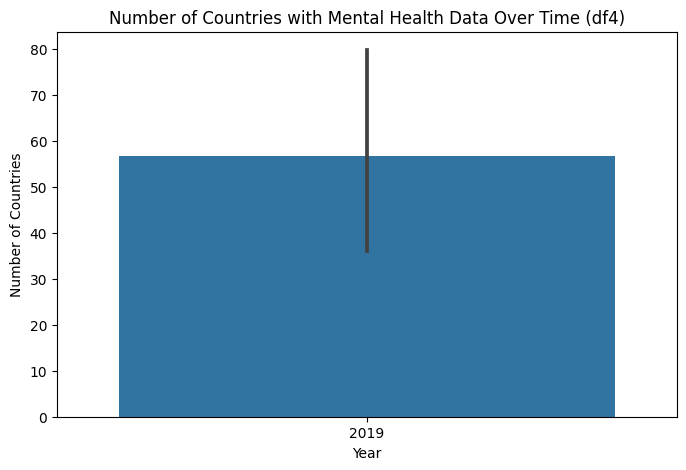

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df4, x='Year', y='Number of countries with primary data on prevalence of mental disorders')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.title('Number of Countries with Mental Health Data Over Time (df4)')
plt.show()


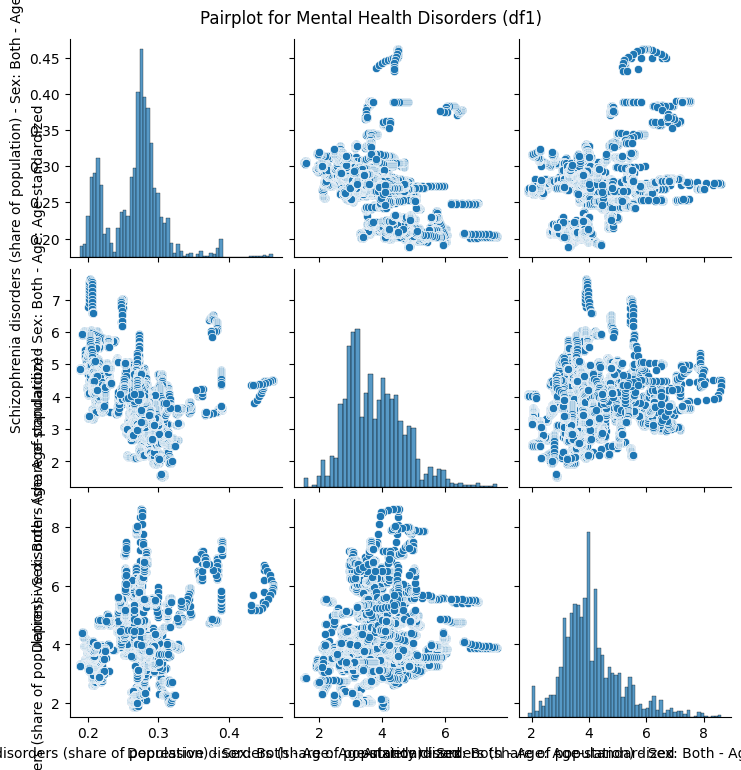

In [ ]:
# Selecting a subset of columns for pairplot, as all variables won't fit in one plot
subset_cols = ['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']

sns.pairplot(df1[subset_cols])
plt.suptitle('Pairplot for Mental Health Disorders (df1)', y=1.02)
plt.show()


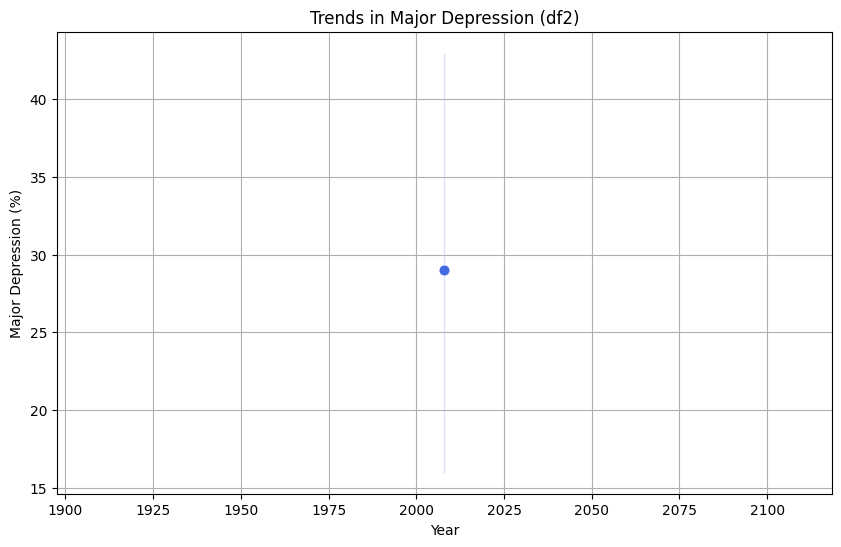

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x='Year', y='Major depression', marker='o', markersize=8, color='royalblue')
plt.xlabel('Year')
plt.ylabel('Major Depression (%)')
plt.title('Trends in Major Depression (df2)')
plt.grid()
plt.show()


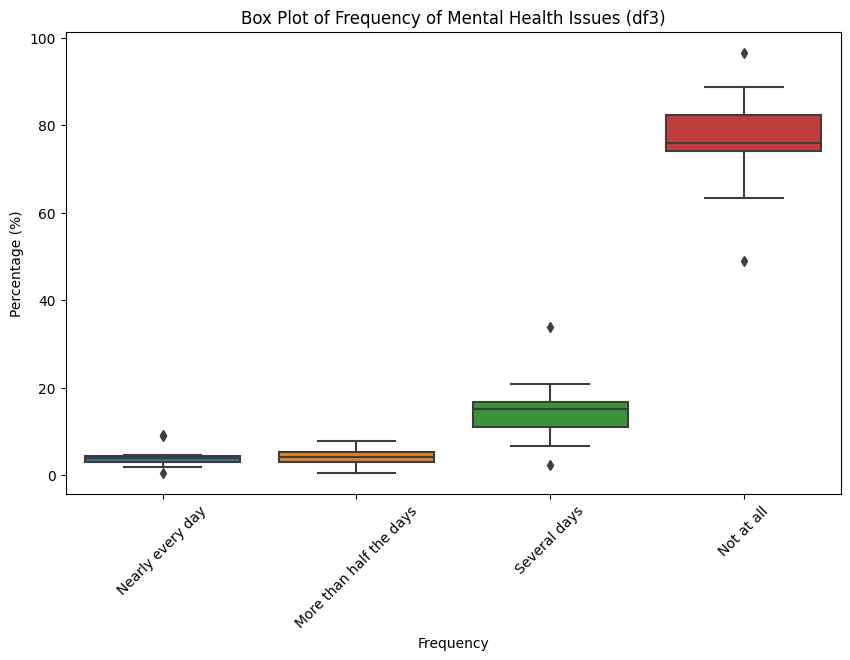

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3.melt(id_vars=['Entity', 'Year']), x='variable', y='value')
plt.xlabel('Frequency')
plt.ylabel('Percentage (%)')
plt.title('Box Plot of Frequency of Mental Health Issues (df3)')
plt.xticks(rotation=45)
plt.show()


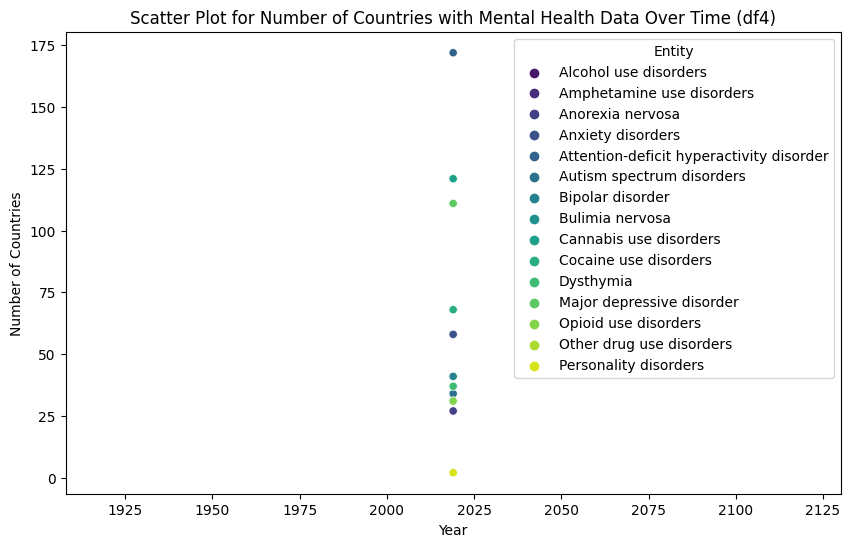

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4, x='Year', y='Number of countries with primary data on prevalence of mental disorders', hue='Entity', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.title('Scatter Plot for Number of Countries with Mental Health Data Over Time (df4)')
plt.legend(title='Entity')
plt.show()


**Machine Learning and Feature Engineering**

Importing machine Learning Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Having that df2 contains the data for the Major depression prediction task
X = df2[['Year']]  # Features
y = df2['Major depression']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a Linear Regression model
model = LinearRegression()

In [ ]:
# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1009.3859999999999
R-squared: -0.1027973464321923


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
import pandas as pd

In [ ]:
# Normalize the features
features = ['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized']
X_model = df1[features]
y_model = df1["Eating disorders (share of population) - Sex: Both - Age: Age-standardized"]

In [ ]:
scaler = StandardScaler()
X_model_norm = scaler.fit_transform(X_model)
X_model_norm

array([[-1.10204633,  1.32843042,  0.58210079,  0.28304415],
       [-1.12114269,  1.32105029,  0.57142548,  0.27895481],
       [-1.13898333,  1.31246405,  0.5539503 ,  0.27348373],
       ...,
       [-1.64970986, -0.3837713 , -0.86954329, -0.42155463],
       [-1.6411448 , -0.38921479, -0.88506705, -0.4215719 ],
       [-1.62831258, -0.40159399, -0.91847542, -0.42159191]])

In [ ]:
# Simple Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X_model_norm, y_model, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5136, 4)
Shape of y_train: (5136,)
Shape of X_test: (1284, 4)
Shape of y_test: (1284,)


In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_regression_model.predict(X_test)

In [ ]:
print("Mean Absolute Error of Model is:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error of Model is:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared of Model is:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score of Model is:", metrics.r2_score(y_test, y_pred))

Mean Absolute Error of Model is: 0.05295538495364769
Mean Squared Error of Model is: 0.006440057266329181
Root Mean Squared of Model is: 0.08024996739145245
R2 Score of Model is: 0.6776573651975213


In [ ]:
k_fold = KFold(10)
print("Cross-Validation Scores:", cross_val_score(linear_regression_model, X_model_norm, y_model.ravel(), cv=k_fold, n_jobs=1))


Cross-Validation Scores: [0.67019159 0.30224538 0.34774549 0.6311535  0.62898747 0.59061848
 0.66269011 0.57389516 0.64517085 0.84017723]


In [ ]:
# Higher Dimension Linear Regression
def check(Dimension, test_size):
    r2 = 0.6289
    for column in X_model:
        New_Col_name = column + str(Dimension)
        New_Col_value = X_model[column]**Dimension
        X_model.insert(0, New_Col_name, New_Col_value)
        X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=test_size, random_state=0)
        New_model = LinearRegression()
        New_model.fit(X_train, y_train)
        y_pred = New_model.predict(X_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            X_model.drop([New_Col_name], axis=1, inplace=True)
        else:
            r2 = r2_new
    print("R2 score is:", r2)


In [ ]:
check(2, 0.2)
print(X_model)

R2 score is: 0.6554298773488345
      Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized2  \
0                                              0.494242                              
1                                              0.492901                              
2                                              0.491109                              
3                                              0.490122                              
4                                              0.489857                              
...                                                 ...                              
6415                                           0.290085                              
6416                                           0.290082                              
6417                                           0.290078                              
6418                                           0.290074                              
6419                  

In [ ]:

# Dot Model
Bipolar_Anx = X_model["Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized"] * X_model["Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized"]
Bipolar_Anx2 = X_model["Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized2"] * X_model["Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized2"]
Dep_Schi = X_model["Depressive disorders (share of population) - Sex: Both - Age: Age-standardized"] * X_model["Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized"]
Dep_Schi2 = X_model["Depressive disorders (share of population) - Sex: Both - Age: Age-standardized2"] * X_model["Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized2"]

In [ ]:

X_model.insert(0, "Bipolar_Anx", Bipolar_Anx)
X_model.insert(0, "Bipolar_Anx2", Bipolar_Anx2)
X_model.insert(0, "Dep_Schi", Dep_Schi)
X_model.insert(0, "Dep_Schi2", Dep_Schi2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=0)
Model = LinearRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.6779169482589383


In [ ]:

# Display Model's Output
a = X_test["Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized"]
b = y_test
c = X_test["Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized"]
d = y_pred


In [ ]:
font1 = {'family': 'fantasy', 'color': 'blue', 'size': 20}
font2 = {'family': 'serif', 'color': 'darkred', 'size': 20}
font3 = {'family': 'cursive', 'color': 'green', 'size': 20}

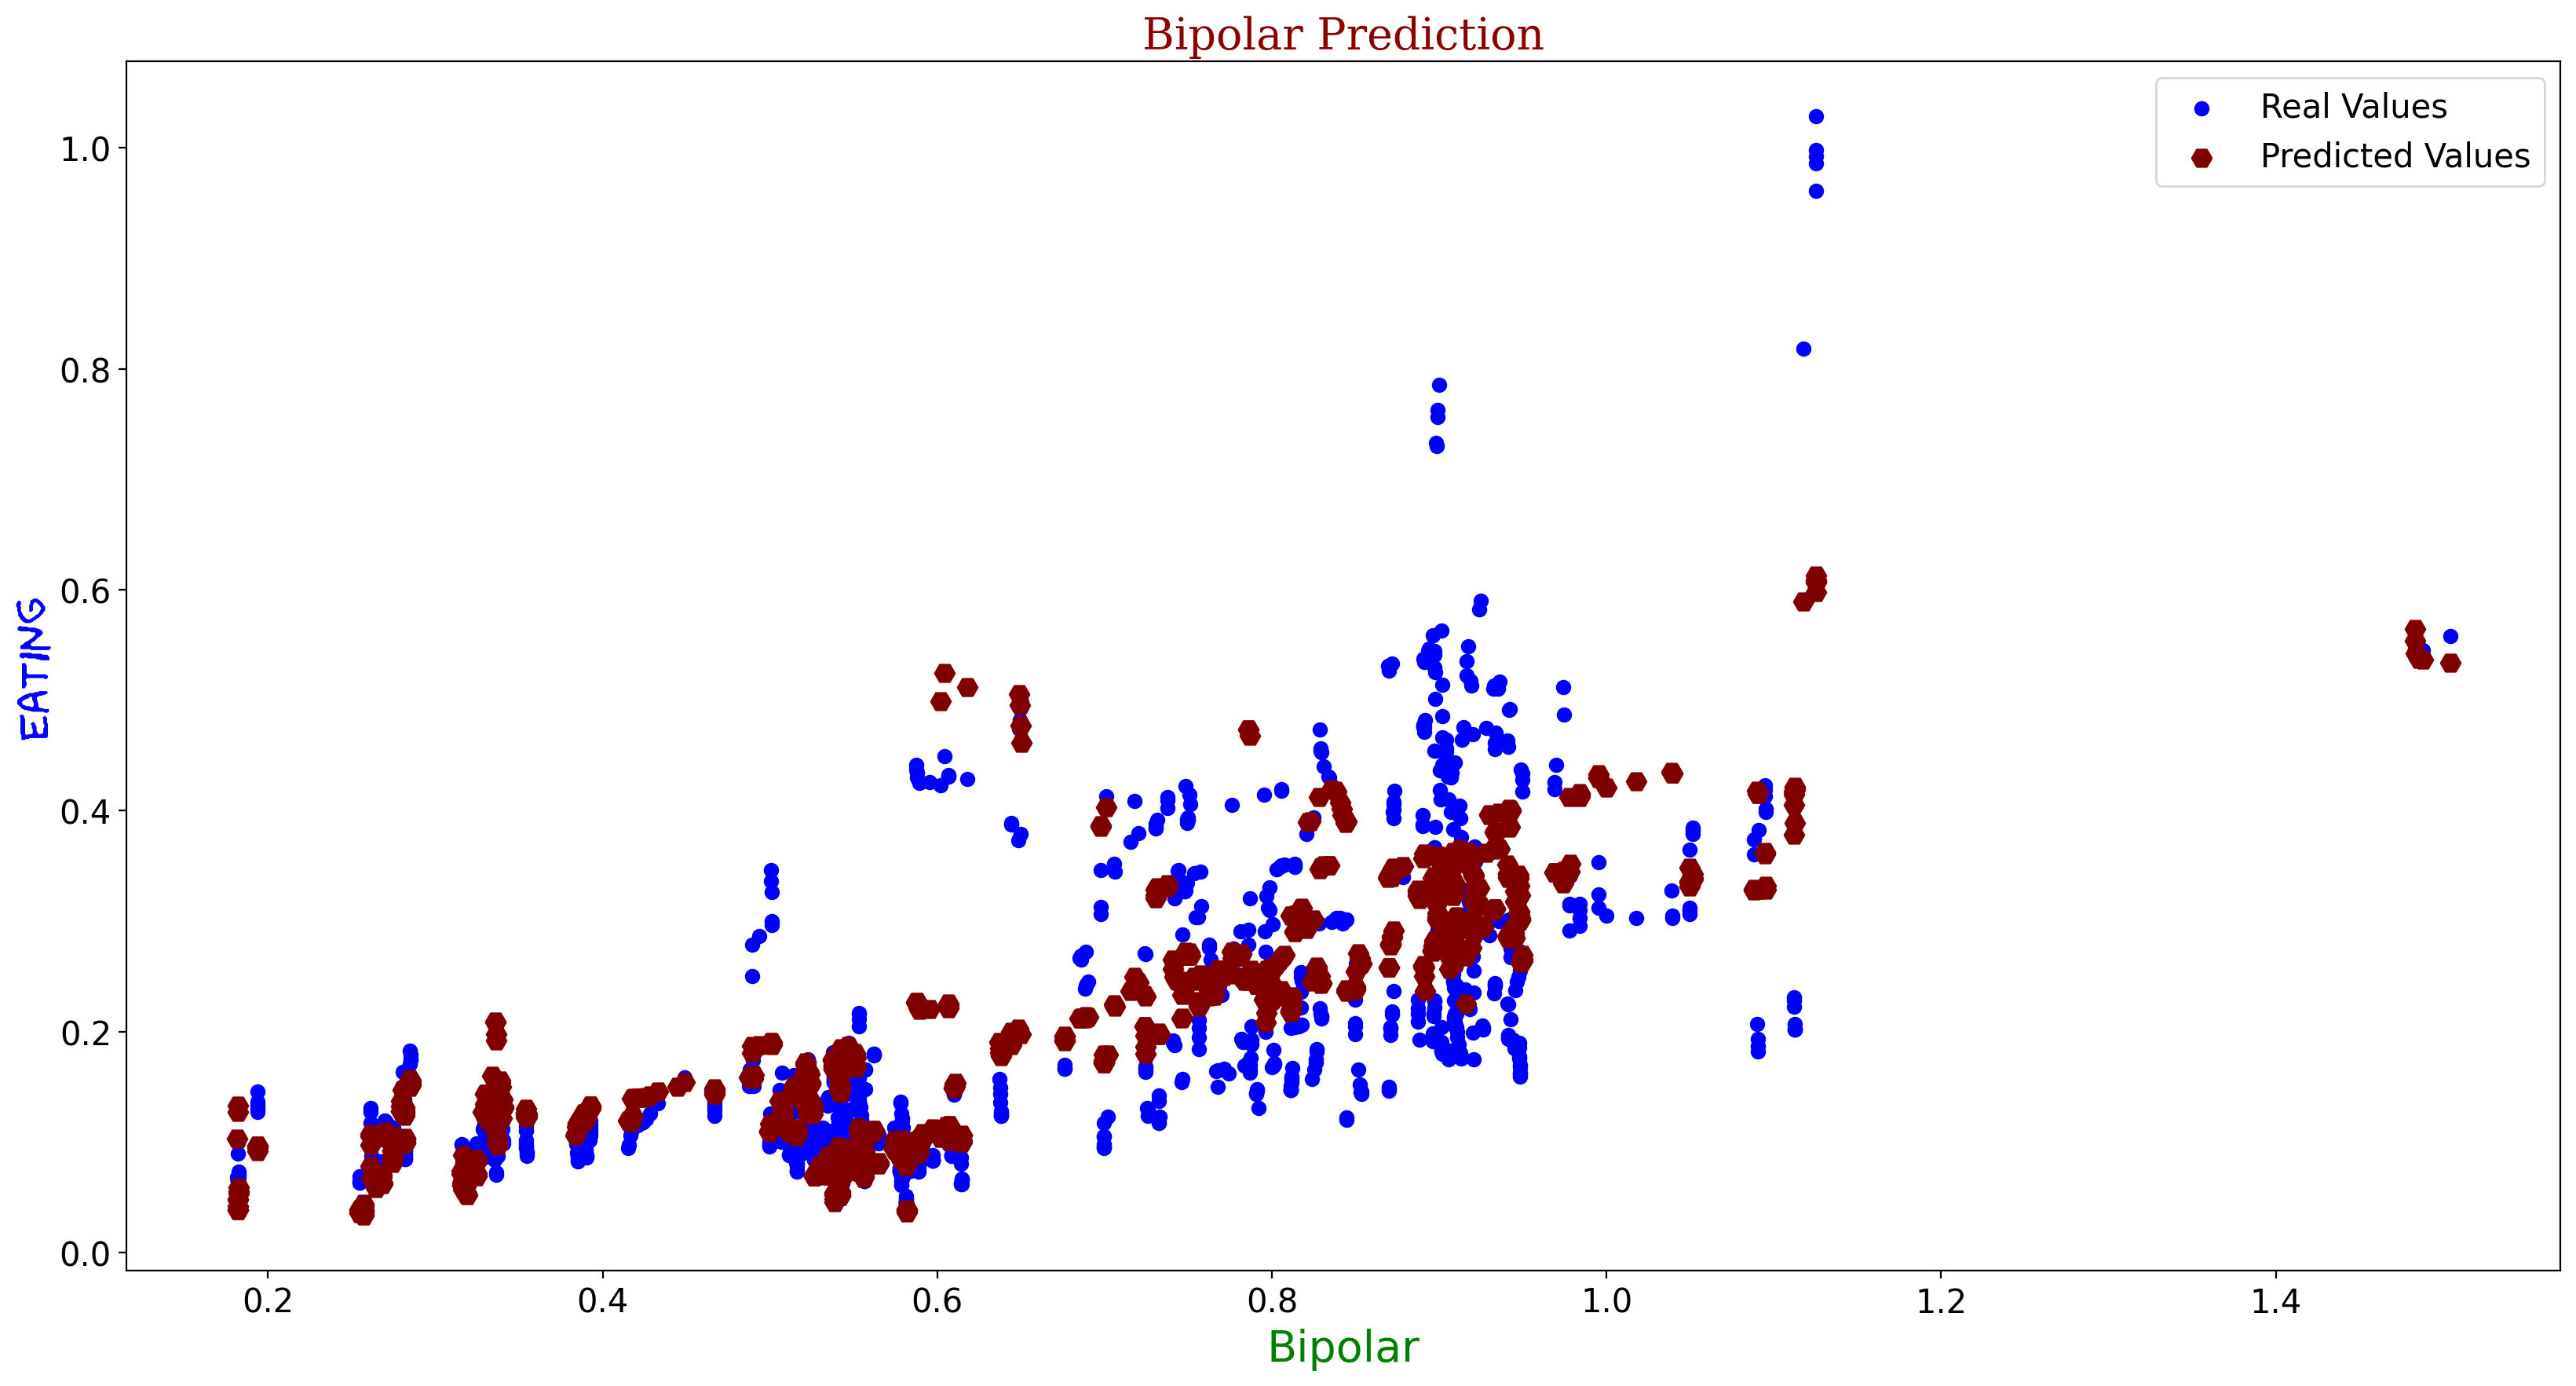

In [ ]:

plt.figure(figsize=(20, 10), dpi=200)
plt.title("Bipolar Prediction", fontdict=font2)
plt.xlabel("Bipolar", fontdict=font3)
plt.ylabel("Eating", fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a, b, color='blue', label="Real Values")
plt.scatter(c, d, color='maroon', label="Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [ ]:

# Display Model's Output
a = X_test["Depressive disorders (share of population) - Sex: Both - Age: Age-standardized"]
b = y_test
c = X_test["Depressive disorders (share of population) - Sex: Both - Age: Age-standardized"]
d = y_pred

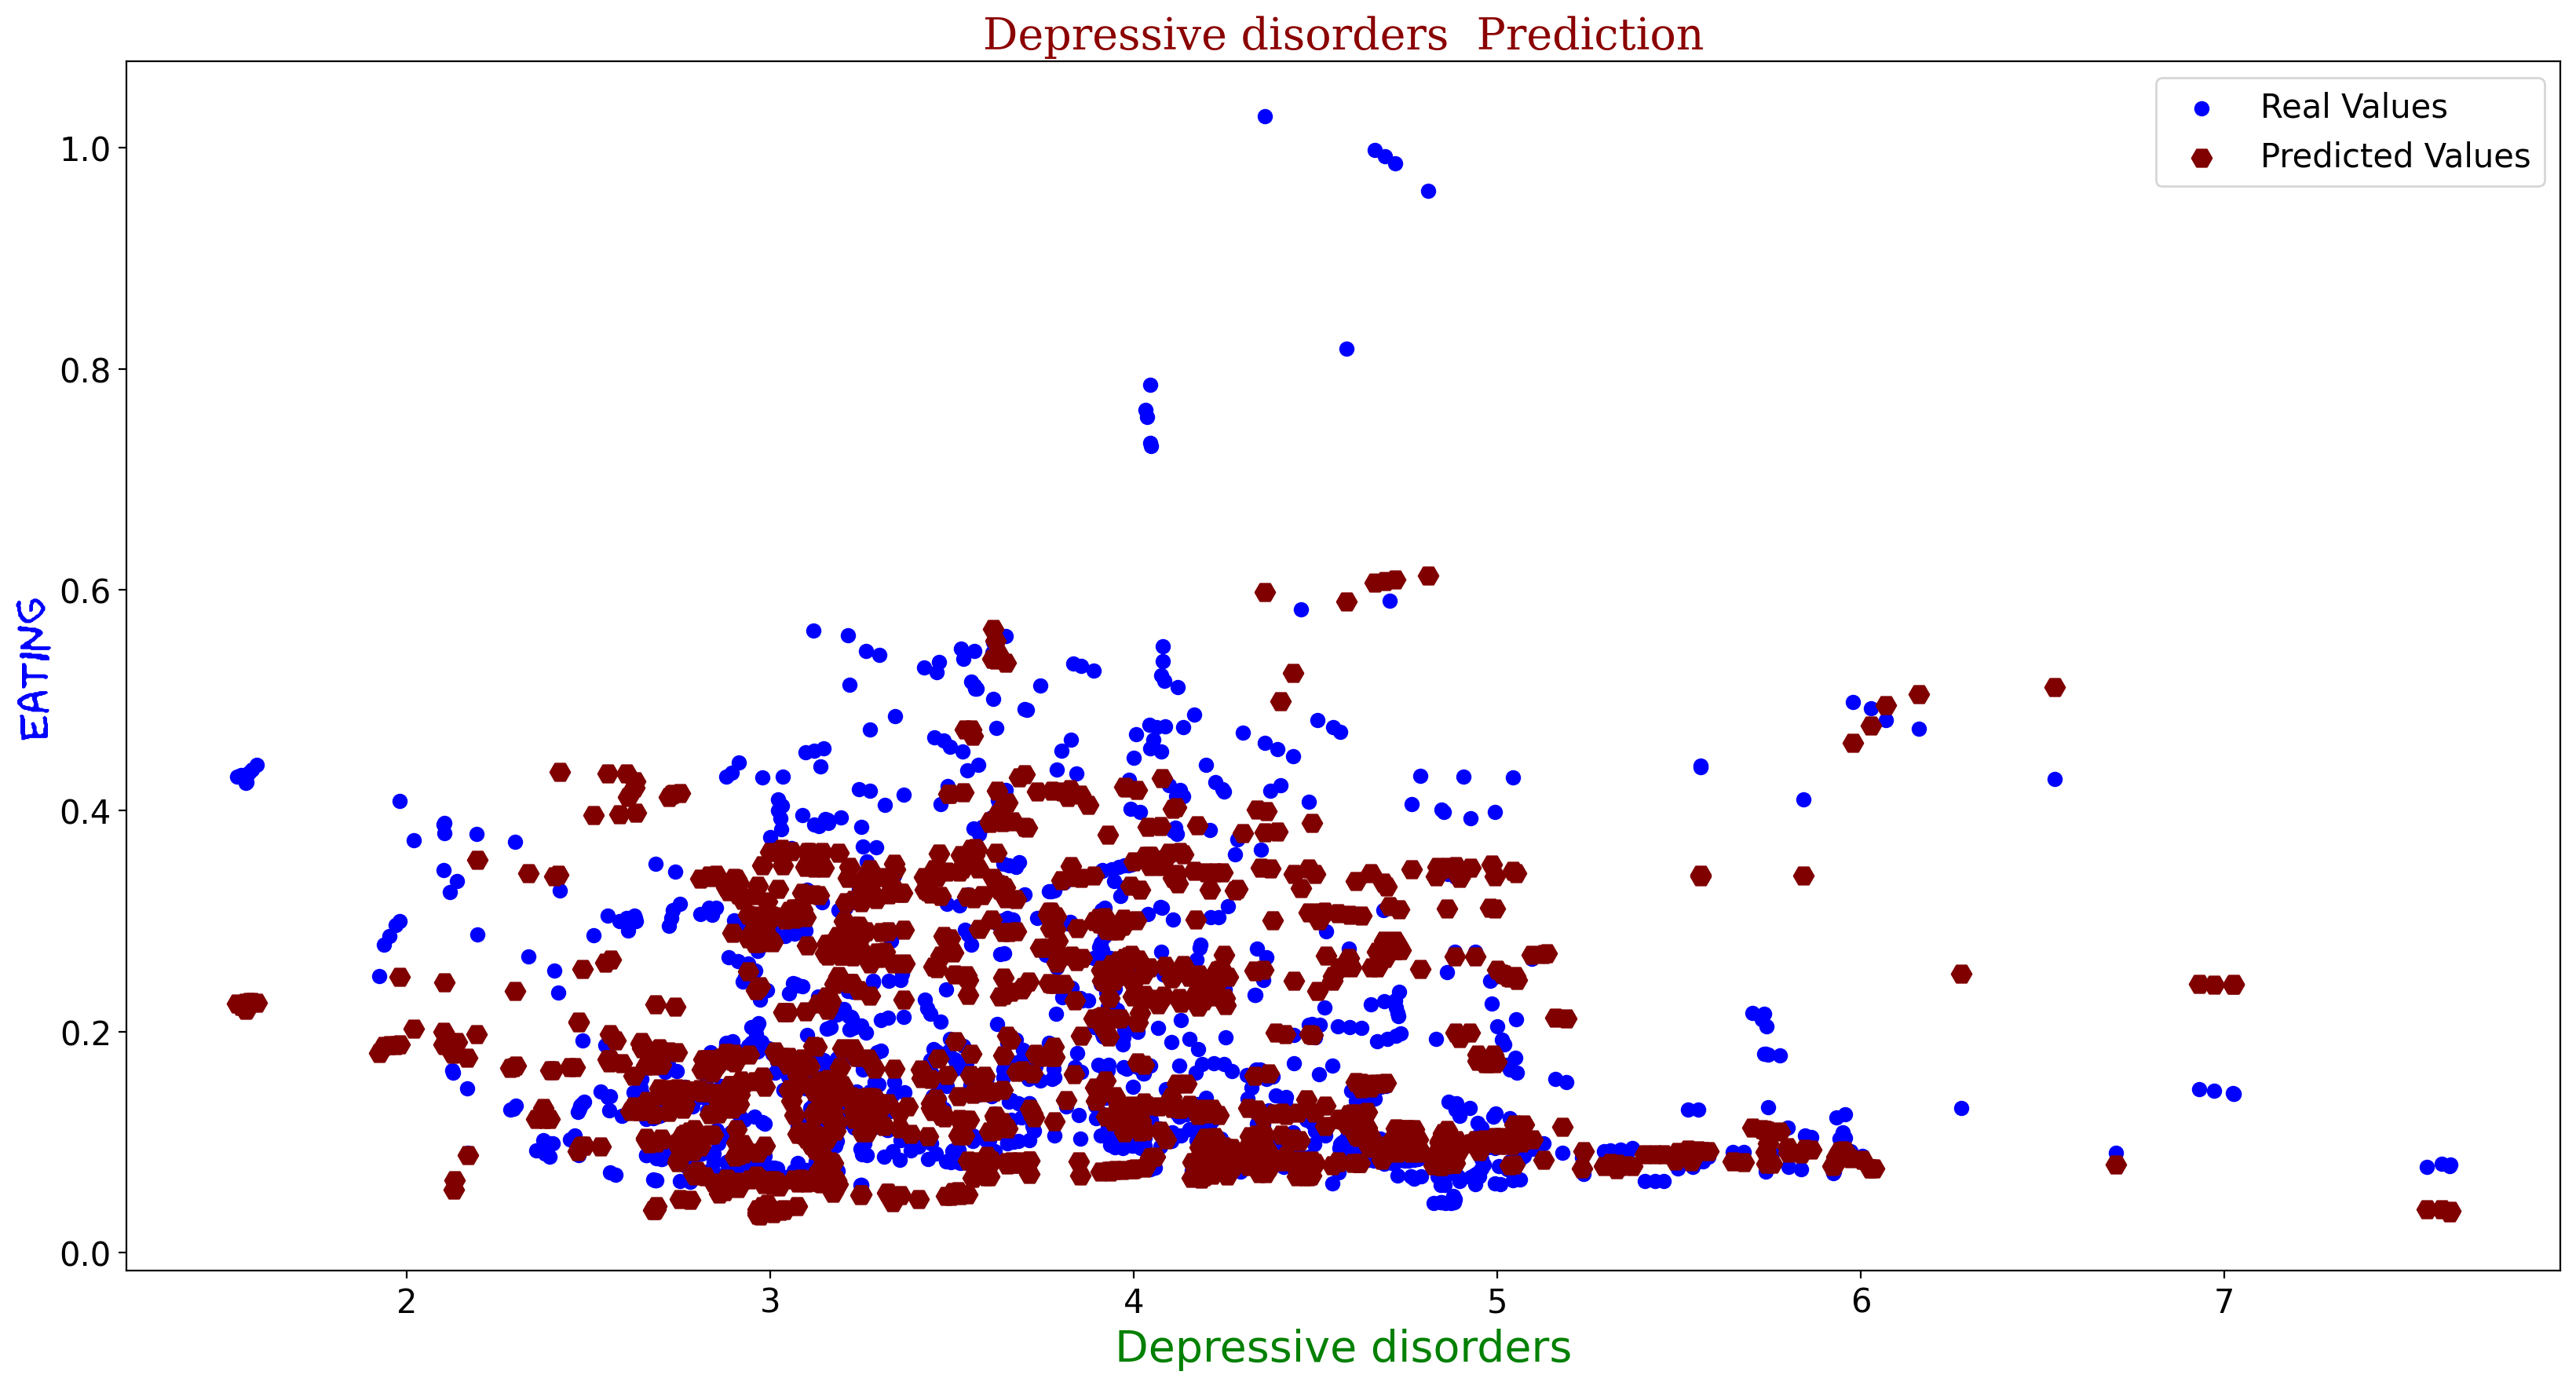

In [ ]:
plt.figure(figsize=(20, 10), dpi=200)
plt.title("Depressive disorders  Prediction", fontdict=font2)
plt.xlabel("Depressive disorders", fontdict=font3)
plt.ylabel("Eating", fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a, b, color='blue', label="Real Values")
plt.scatter(c, d, color='maroon', label="Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [ ]:
# Display Model's Output
a = X_test["Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized"]
b = y_test
c = X_test["Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized"]
d = y_pred

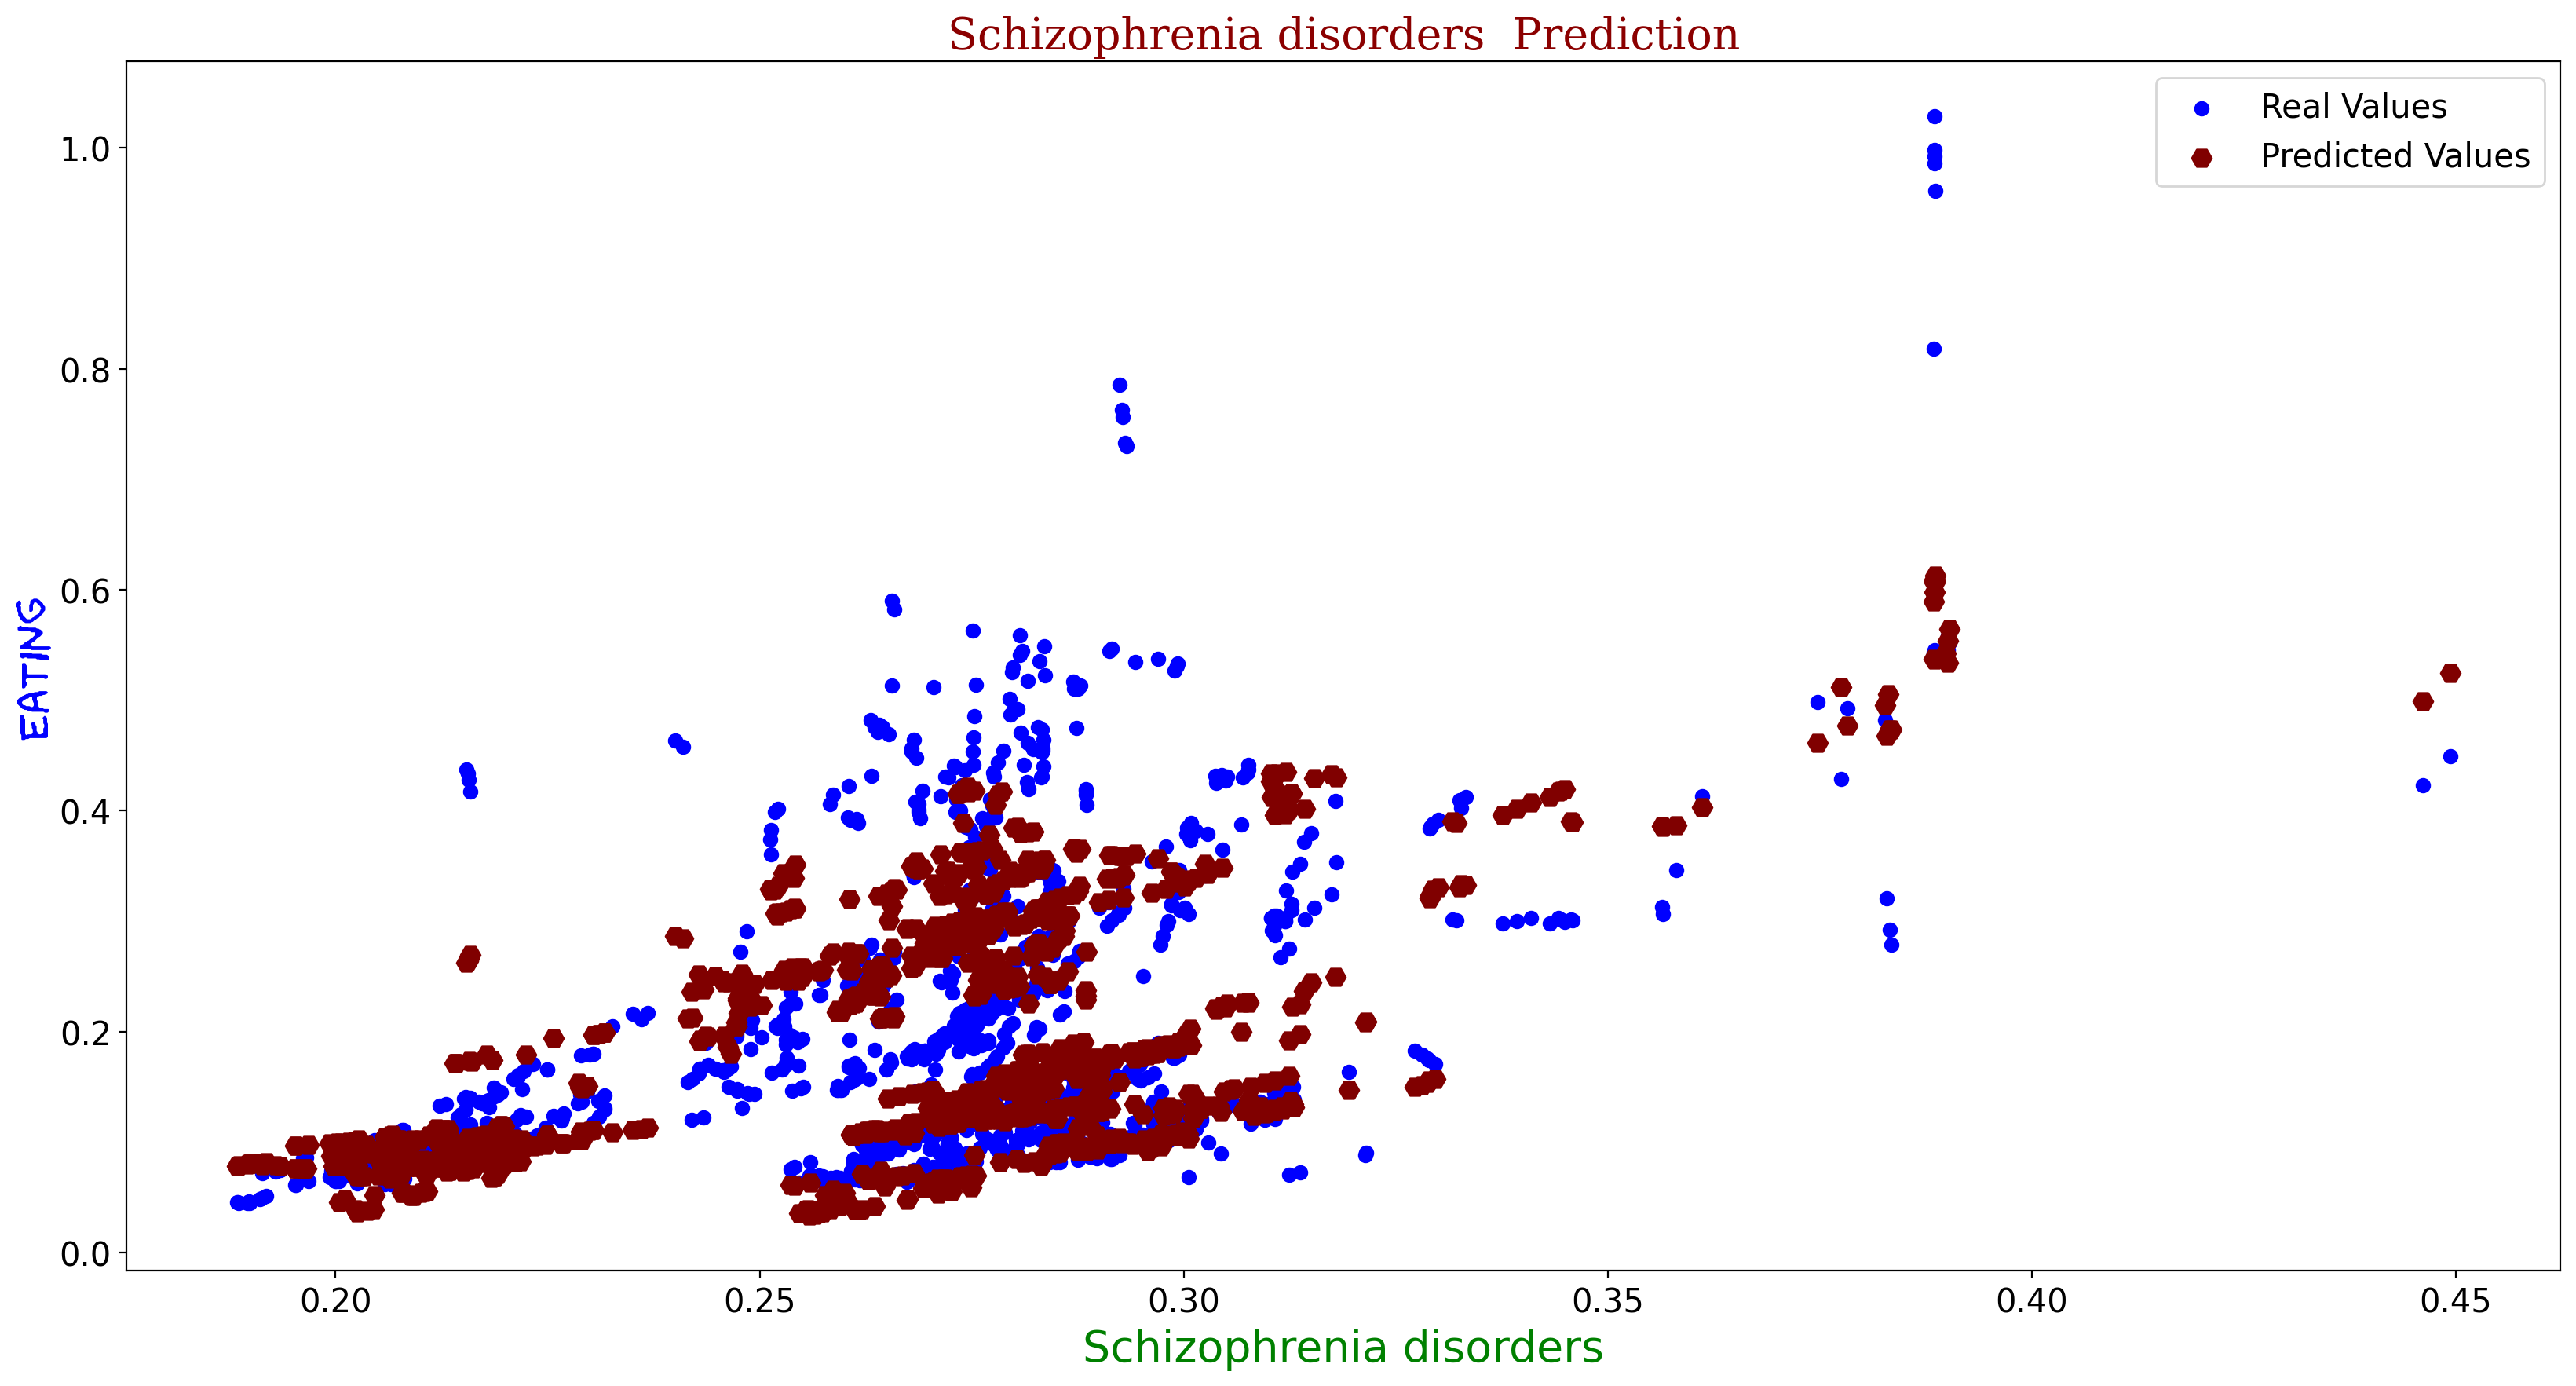

In [ ]:
plt.figure(figsize=(20, 10), dpi=200)
plt.title("Schizophrenia disorders  Prediction", fontdict=font2)
plt.xlabel("Schizophrenia disorders", fontdict=font3)
plt.ylabel("Eating", fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a, b, color='blue', label="Real Values")
plt.scatter(c, d, color='maroon', label="Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [ ]:
# Display Model's Output
a = X_test["Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized2"]
b = y_test
c = X_test["Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized2"]
d = y_pred

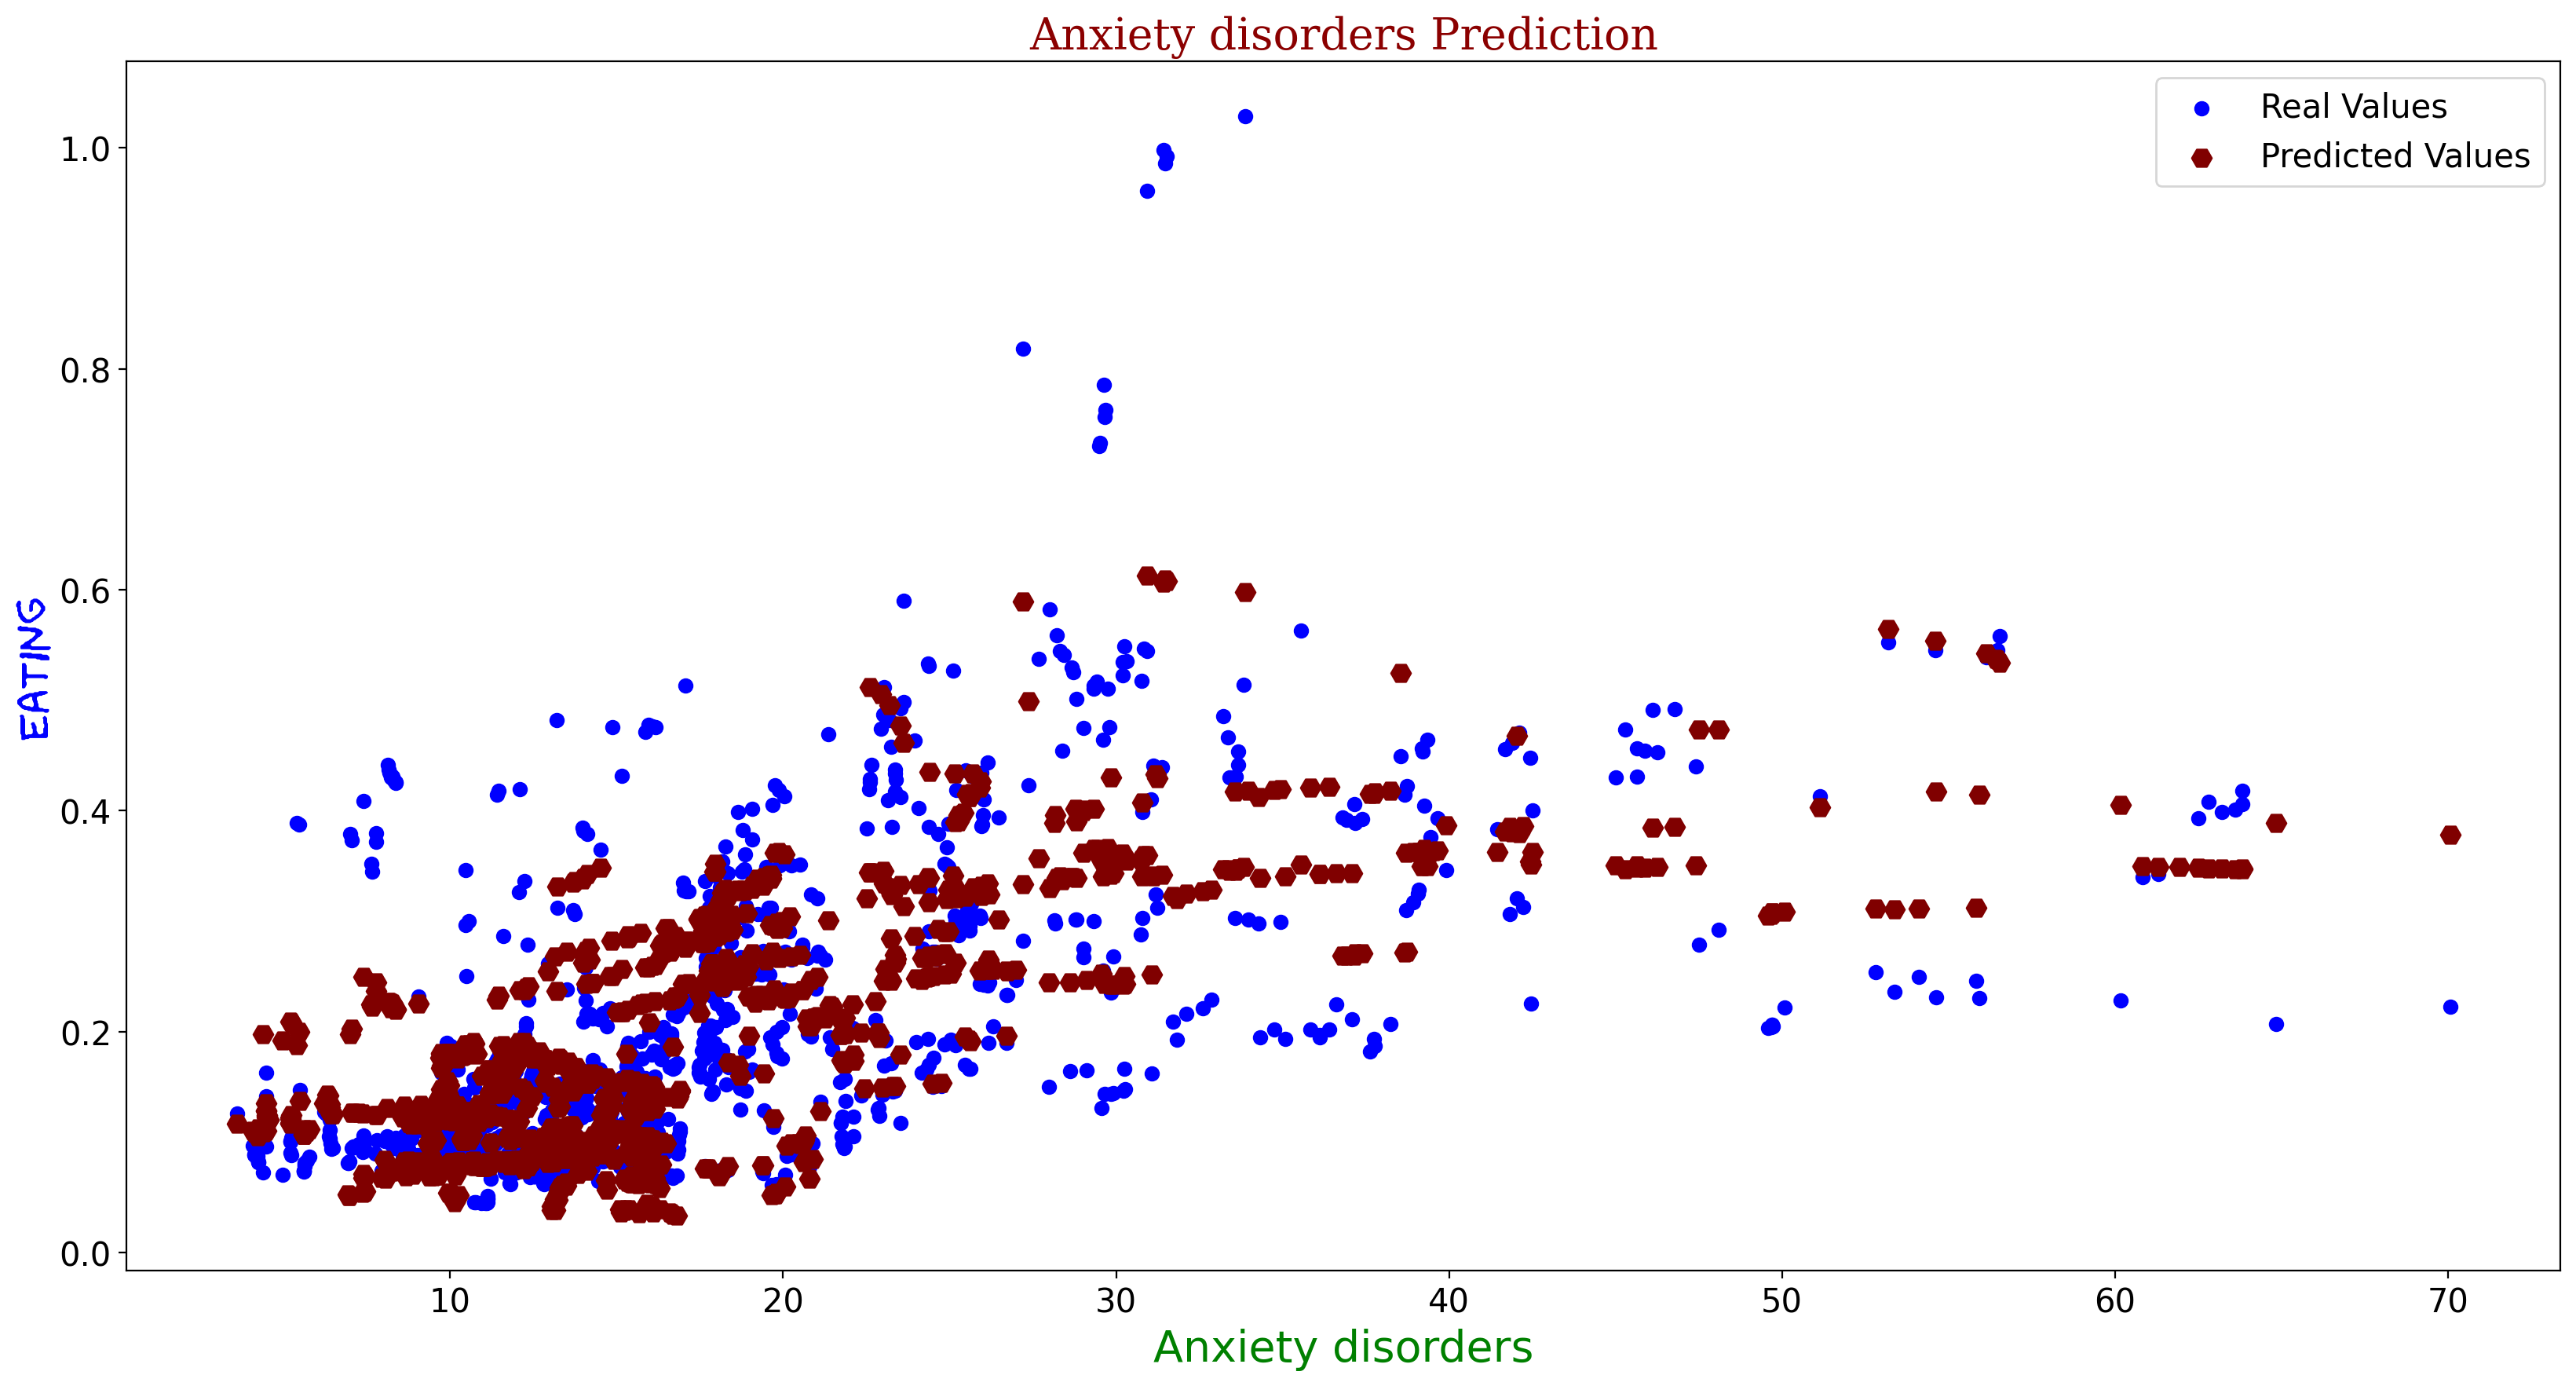

In [ ]:
plt.figure(figsize=(20, 10), dpi=200)
plt.title("Anxiety disorders Prediction", fontdict=font2)
plt.xlabel("Anxiety disorders", fontdict=font3)
plt.ylabel("Eating", fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a, b, color='blue', label="Real Values")
plt.scatter(c, d, color='maroon', label="Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()